### Banking Fraud Detection Analysis
We examined a large set of banking transactions to understand patterns of fraud—when someone tries to cheat or steal money through fake or suspicious transactions. The goal is to spot what makes a transaction risky and how banks can better protect customers.


In [3]:
# Banking Fraud Detection - Comprehensive Descriptive Analysis
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv("Data\Banking_Fraud_Dataset.csv")

print("=" * 60)
print("BANKING FRAUD DETECTION - DESCRIPTIVE ANALYSIS")
print("=" * 60)

BANKING FRAUD DETECTION - DESCRIPTIVE ANALYSIS


## 1. Dataset Overview

In [4]:
print("1. DATASET BASIC INFORMATION")
print("=" * 40)

print(f"Dataset Shape: {df.shape}")
print(f"Number of Transactions: {len(df):,}")
print(f"Number of Features: {len(df.columns)}")
print(f"Number of Unique Customers: {df['Customer_ID'].nunique():,}")

print("\nColumn Names and Data Types:")
print(df.dtypes)

print("\nFirst 5 rows:")
print(df.head())

1. DATASET BASIC INFORMATION
Dataset Shape: (10000, 11)
Number of Transactions: 10,000
Number of Features: 11
Number of Unique Customers: 5,985

Column Names and Data Types:
Transaction_ID           object
Customer_ID              object
Transaction_Amount      float64
Transaction_Type         object
Transaction_Location     object
Transaction_Time         object
Device_Used              object
Account_Age               int64
Credit_Score              int64
Previous_Fraud            int64
Is_Fraud                  int64
dtype: object

First 5 rows:
  Transaction_ID Customer_ID  Transaction_Amount Transaction_Type  \
0             T1       C2539             8527.58          Deposit   
1             T2       C5318             9275.82          Deposit   
2             T3       C8262             2202.49   Online Payment   
3             T4       C3865             9352.32          Deposit   
4             T5       C7248             2081.75   Online Payment   

                   Transaction

In [5]:
print("\nMissing Values Analysis:")
print("=" * 30)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_info[missing_info['Missing Count'] > 0])


Missing Values Analysis:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


- We loaded the bank transactions data.
- Each row is a transaction; columns show details like amount, type, and if it was fraud.
- We checked for missing data to make sure our analysis is accurate.

## 2. Target Variable Analysis


2. TARGET VARIABLE ANALYSIS (Is_Fraud)
Fraud Distribution:
Legitimate Transactions: 7,162 (71.62%)
Fraudulent Transactions: 2,838 (28.38%)


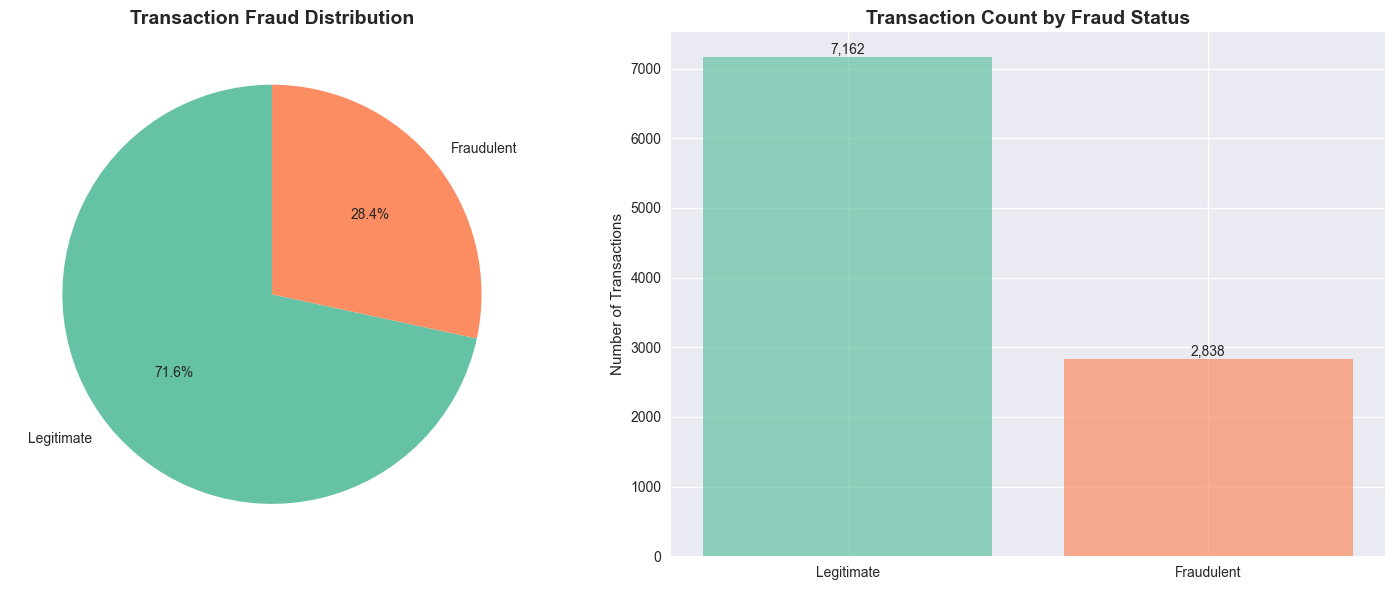

In [6]:
print("\n2. TARGET VARIABLE ANALYSIS (Is_Fraud)")
print("=" * 50)

fraud_counts = df['Is_Fraud'].value_counts()
fraud_percent = df['Is_Fraud'].value_counts(normalize=True) * 100

print("Fraud Distribution:")
for i, (count, percent) in enumerate(zip(fraud_counts, fraud_percent)):
    fraud_type = "Fraudulent" if i == 1 else "Legitimate"
    print(f"{fraud_type} Transactions: {count:,} ({percent:.2f}%)")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
colors = ['#66c2a5', '#fc8d62']
ax1.pie(fraud_counts, labels=['Legitimate', 'Fraudulent'], autopct='%1.1f%%', 
        colors=colors, startangle=90)
ax1.set_title('Transaction Fraud Distribution', fontsize=14, fontweight='bold')

# Bar chart
bars = ax2.bar(['Legitimate', 'Fraudulent'], fraud_counts, color=colors, alpha=0.7)
ax2.set_title('Transaction Count by Fraud Status', fontsize=14, fontweight='bold')
ax2.set_ylabel('Number of Transactions')
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### What does this mean?
- Most transactions are legitimate; only a small part are fraudulent.
- The pie and bar charts show how rare fraud is, but even a small percentage can be costly.

## 3. Numerical Features Analysis

In [7]:
print("\n3. NUMERICAL FEATURES ANALYSIS")
print("=" * 40)

numerical_cols = ['Transaction_Amount', 'Account_Age', 'Credit_Score']
print("Descriptive Statistics for Numerical Features:")
print(df[numerical_cols].describe())


3. NUMERICAL FEATURES ANALYSIS
Descriptive Statistics for Numerical Features:
       Transaction_Amount   Account_Age  Credit_Score
count        10000.000000  10000.000000   10000.00000
mean          4997.492361     10.646900     578.66280
std           2914.985459      5.760186     158.73193
min             10.890000      1.000000     300.00000
25%           2469.642500      6.000000     442.00000
50%           4985.325000     11.000000     581.00000
75%           7557.885000     16.000000     715.00000
max           9999.290000     20.000000     850.00000


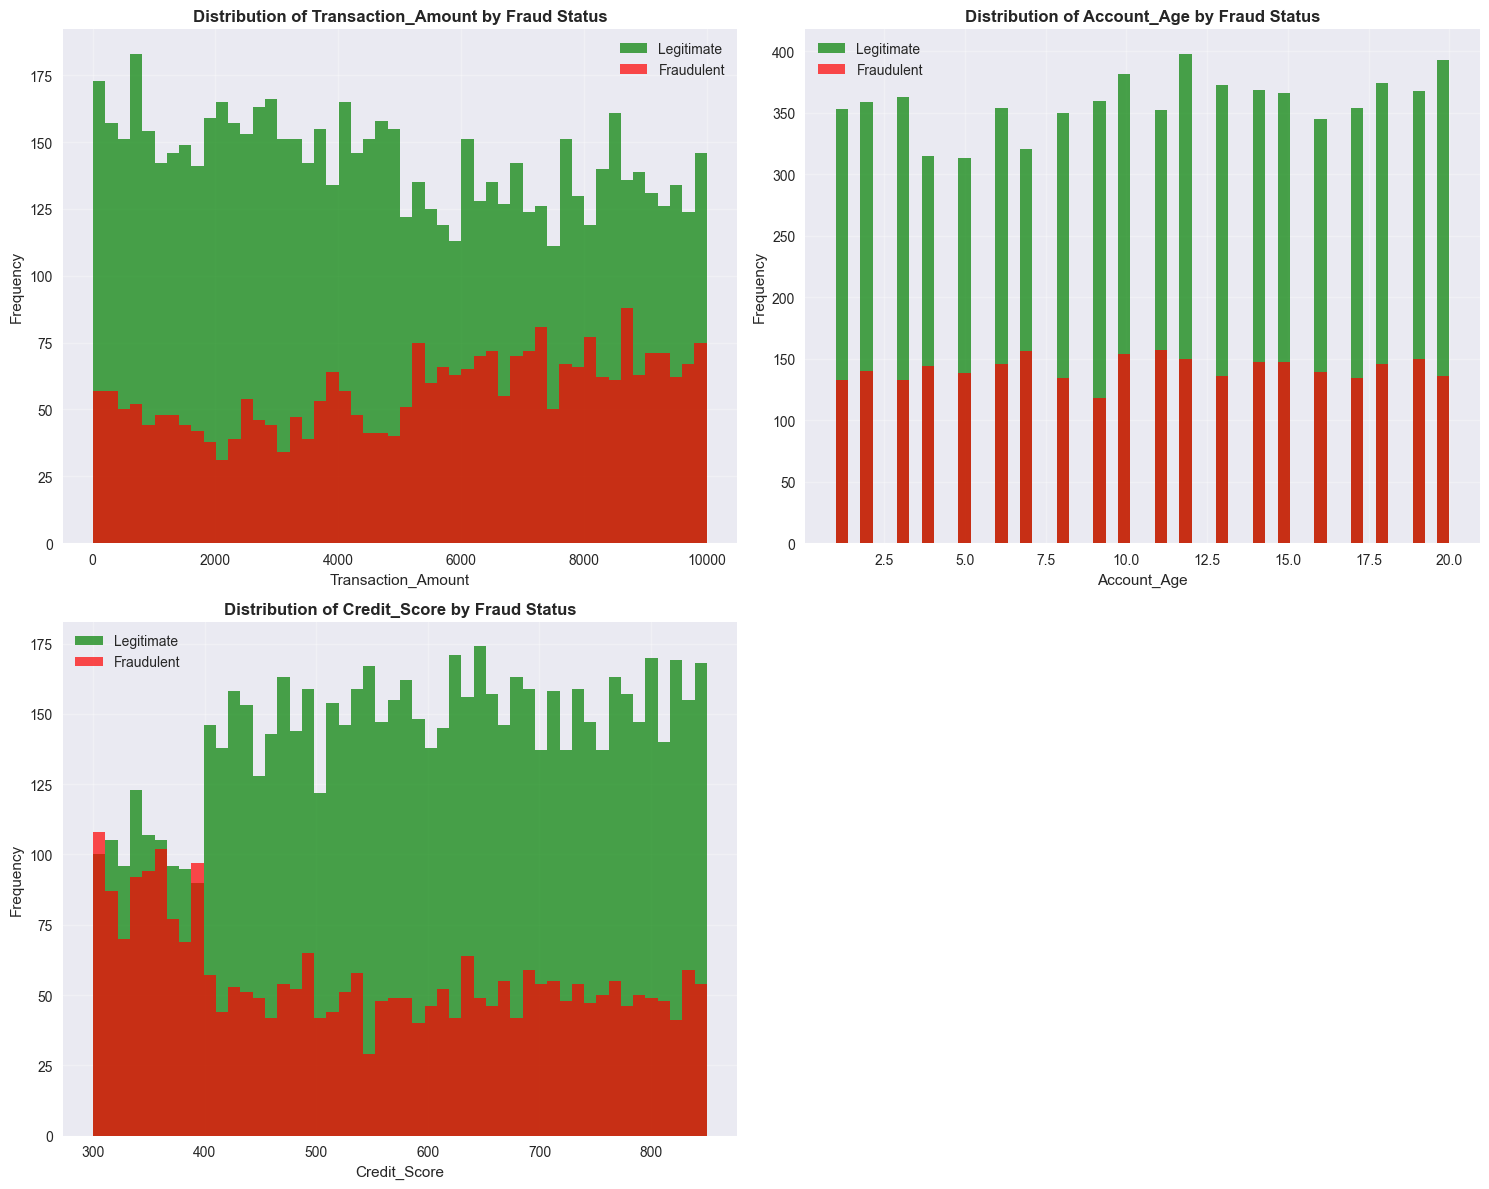

In [8]:
# Distribution of numerical features by fraud status
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    # Legitimate transactions
    legit_data = df[df['Is_Fraud'] == 0][col]
    # Fraudulent transactions
    fraud_data = df[df['Is_Fraud'] == 1][col]
    
    axes[i].hist(legit_data, bins=50, alpha=0.7, label='Legitimate', color='green')
    axes[i].hist(fraud_data, bins=50, alpha=0.7, label='Fraudulent', color='red')
    axes[i].set_title(f'Distribution of {col} by Fraud Status', fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

# Remove empty subplot
fig.delaxes(axes[3])
plt.tight_layout()
plt.show()

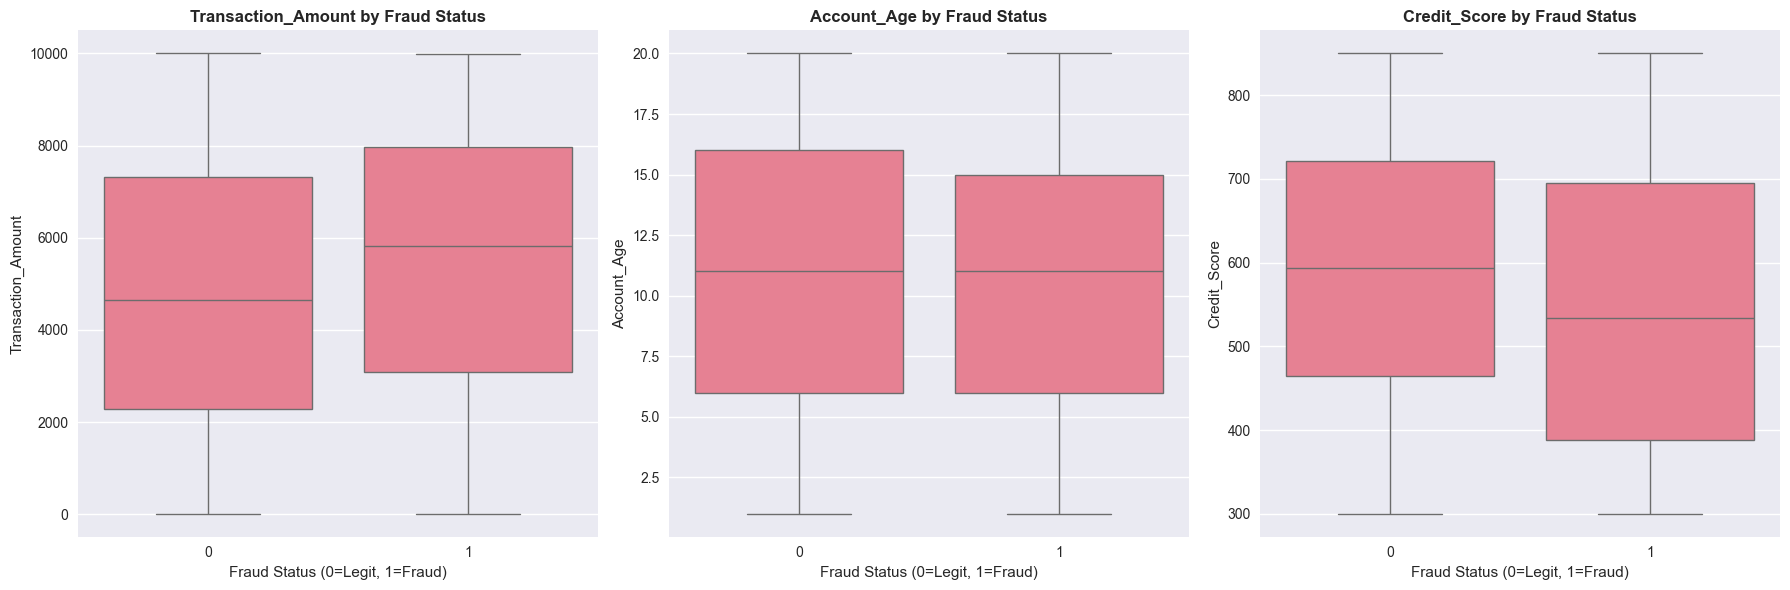

In [9]:
# Box plots for numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(numerical_cols):
    sns.boxplot(x='Is_Fraud', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} by Fraud Status', fontweight='bold')
    axes[i].set_xlabel('Fraud Status (0=Legit, 1=Fraud)')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

We looked at numbers like transaction amount, account age, and credit score.
- Fraudulent transactions often have different patterns (like higher amounts) compared to normal ones.
- The charts help us see these differences.

## 4. Categorical Features Analysis

In [10]:
print("\n4. CATEGORICAL FEATURES ANALYSIS")
print("=" * 45)

categorical_cols = ['Transaction_Type', 'Device_Used', 'Previous_Fraud']


4. CATEGORICAL FEATURES ANALYSIS


In [11]:
# Transaction Type Analysis
print("\nTransaction Type Analysis:")
print("-" * 25)
transaction_fraud = df.groupby('Transaction_Type')['Is_Fraud'].agg(['count', 'mean', 'sum'])
transaction_fraud['fraud_percentage'] = transaction_fraud['mean'] * 100
transaction_fraud['fraud_count'] = transaction_fraud['sum']
transaction_fraud = transaction_fraud[['count', 'fraud_count', 'fraud_percentage']]
transaction_fraud.columns = ['Total_Transactions', 'Fraud_Count', 'Fraud_Percentage']
print(transaction_fraud.sort_values('Fraud_Percentage', ascending=False))


Transaction Type Analysis:
-------------------------
                  Total_Transactions  Fraud_Count  Fraud_Percentage
Transaction_Type                                                   
Withdrawal                      2547          751         29.485669
Online Payment                  2517          730         29.002781
Deposit                         2420          682         28.181818
Transfer                        2516          675         26.828299


In [12]:
# Device Used Analysis
print("\nDevice Used Analysis:")
print("-" * 20)
device_fraud = df.groupby('Device_Used')['Is_Fraud'].agg(['count', 'mean', 'sum'])
device_fraud['fraud_percentage'] = device_fraud['mean'] * 100
device_fraud['fraud_count'] = device_fraud['sum']
device_fraud = device_fraud[['count', 'fraud_count', 'fraud_percentage']]
device_fraud.columns = ['Total_Transactions', 'Fraud_Count', 'Fraud_Percentage']
print(device_fraud.sort_values('Fraud_Percentage', ascending=False))


Device Used Analysis:
--------------------
              Total_Transactions  Fraud_Count  Fraud_Percentage
Device_Used                                                    
Mobile                      2495          717         28.737475
POS Terminal                2493          707         28.359406
Web                         2484          701         28.220612
ATM                         2528          713         28.204114


In [13]:
# Previous Fraud Analysis
print("\nPrevious Fraud History Analysis:")
print("-" * 30)
previous_fraud_analysis = df.groupby('Previous_Fraud')['Is_Fraud'].agg(['count', 'mean', 'sum'])
previous_fraud_analysis['fraud_percentage'] = previous_fraud_analysis['mean'] * 100
previous_fraud_analysis['fraud_count'] = previous_fraud_analysis['sum']
previous_fraud_analysis = previous_fraud_analysis[['count', 'fraud_count', 'fraud_percentage']]
previous_fraud_analysis.columns = ['Total_Transactions', 'Fraud_Count', 'Fraud_Percentage']
print(previous_fraud_analysis)


Previous Fraud History Analysis:
------------------------------
                Total_Transactions  Fraud_Count  Fraud_Percentage
Previous_Fraud                                                   
0                             4983          651         13.064419
1                             5017         2187         43.591788


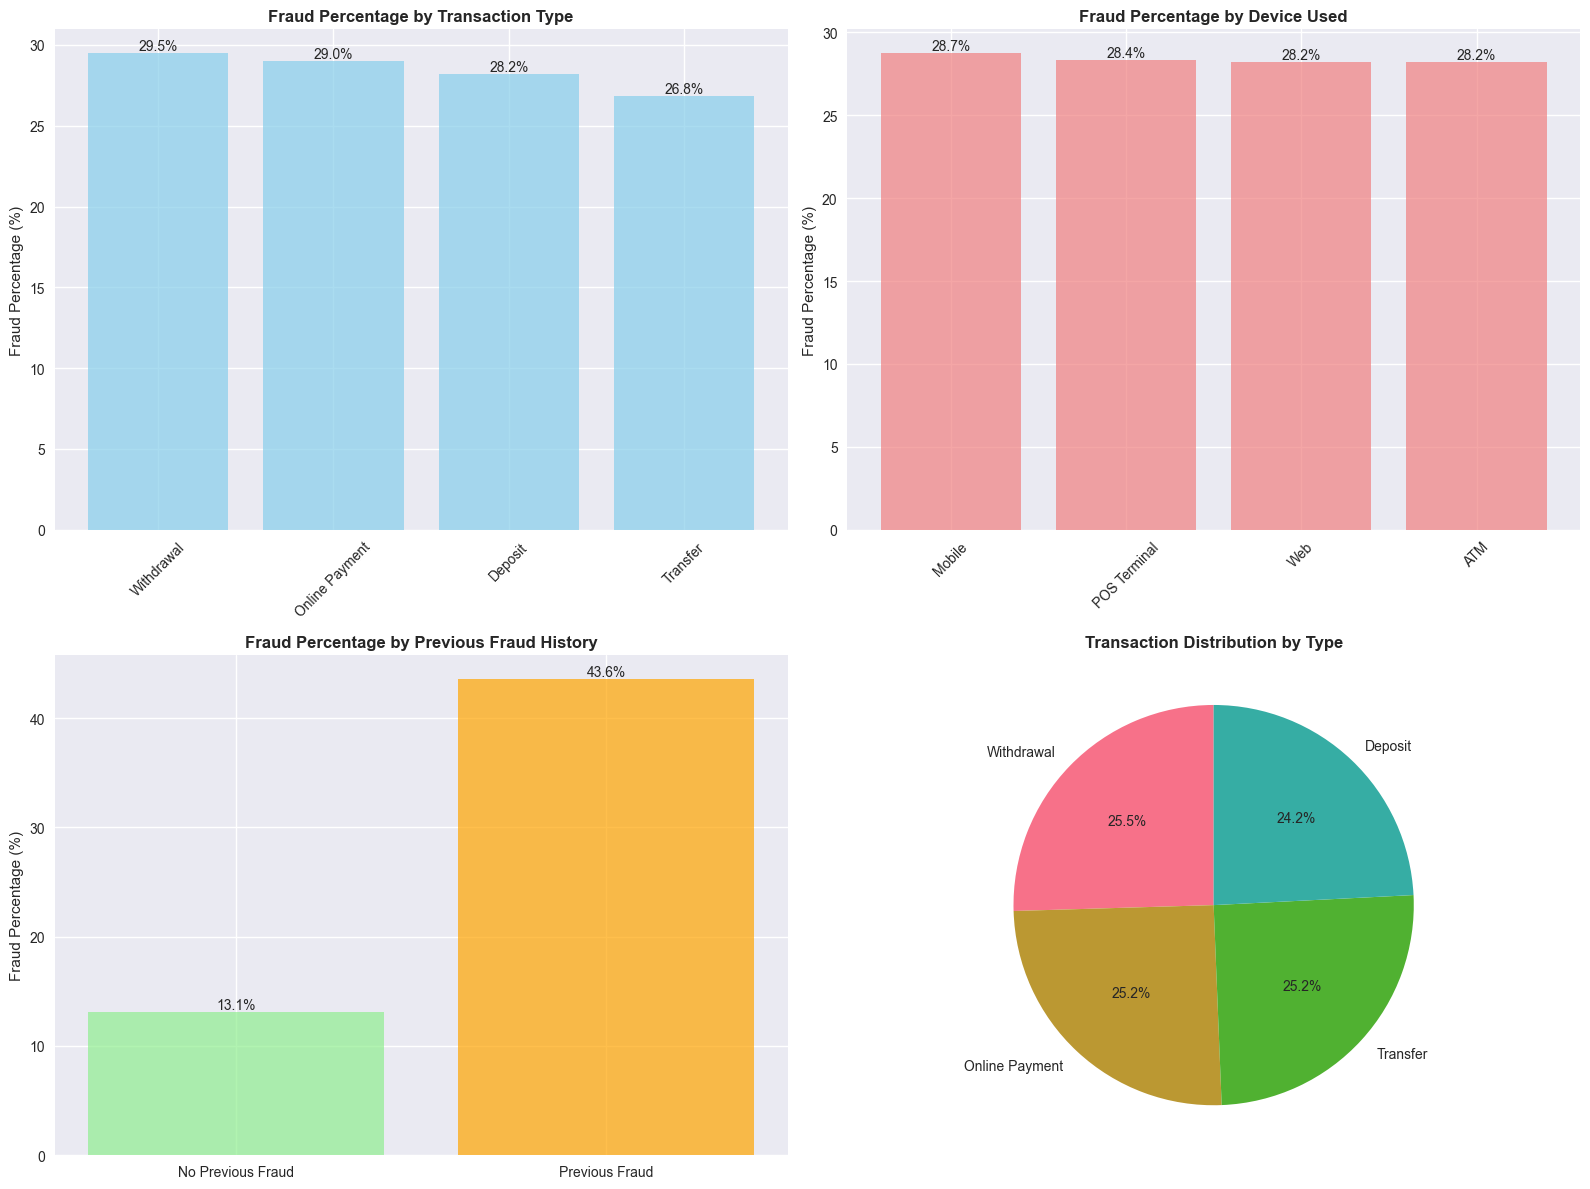

In [14]:
# Visualizations for categorical features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Transaction Type
transaction_fraud_plot = df.groupby('Transaction_Type')['Is_Fraud'].mean().sort_values(ascending=False)
bars1 = axes[0,0].bar(transaction_fraud_plot.index, transaction_fraud_plot.values * 100, color='skyblue', alpha=0.7)
axes[0,0].set_title('Fraud Percentage by Transaction Type', fontweight='bold')
axes[0,0].set_ylabel('Fraud Percentage (%)')
axes[0,0].tick_params(axis='x', rotation=45)
for bar in bars1:
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height,
                  f'{height:.1f}%', ha='center', va='bottom')

# Device Used
device_fraud_plot = df.groupby('Device_Used')['Is_Fraud'].mean().sort_values(ascending=False)
bars2 = axes[0,1].bar(device_fraud_plot.index, device_fraud_plot.values * 100, color='lightcoral', alpha=0.7)
axes[0,1].set_title('Fraud Percentage by Device Used', fontweight='bold')
axes[0,1].set_ylabel('Fraud Percentage (%)')
axes[0,1].tick_params(axis='x', rotation=45)
for bar in bars2:
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height,
                  f'{height:.1f}%', ha='center', va='bottom')

# Previous Fraud
previous_fraud_plot = df.groupby('Previous_Fraud')['Is_Fraud'].mean()
bars3 = axes[1,0].bar(['No Previous Fraud', 'Previous Fraud'], previous_fraud_plot.values * 100, 
                     color=['lightgreen', 'orange'], alpha=0.7)
axes[1,0].set_title('Fraud Percentage by Previous Fraud History', fontweight='bold')
axes[1,0].set_ylabel('Fraud Percentage (%)')
for bar in bars3:
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height,
                  f'{height:.1f}%', ha='center', va='bottom')

# Transaction Count by Type
transaction_counts = df['Transaction_Type'].value_counts()
axes[1,1].pie(transaction_counts.values, labels=transaction_counts.index, autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('Transaction Distribution by Type', fontweight='bold')

plt.tight_layout()
plt.show()

Some types of transactions and devices are riskier than others.
- If someone has a history of fraud, their transactions are more likely to be flagged.
- These patterns help banks know where to look for fraud.

## 5. Time Series Analysis

In [15]:
print("\n5. TIME SERIES ANALYSIS")
print("=" * 35)

# Convert Transaction_Time to datetime
df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'])
df['Hour'] = df['Transaction_Time'].dt.hour
df['DayOfWeek'] = df['Transaction_Time'].dt.day_name()
df['Date'] = df['Transaction_Time'].dt.date


5. TIME SERIES ANALYSIS


In [16]:
# Hourly fraud patterns
print("\nHourly Fraud Patterns:")
print("-" * 25)
hourly_fraud = df.groupby('Hour')['Is_Fraud'].mean() * 100
print(hourly_fraud.sort_values(ascending=False).head(10))


Hourly Fraud Patterns:
-------------------------
Hour
19    31.182796
10    30.693069
7     30.068337
2     30.023641
18    29.975430
13    29.879518
16    29.716981
11    29.567308
17    29.487179
3     29.397590
Name: Is_Fraud, dtype: float64


In [17]:
# Daily fraud patterns
print("\nDaily Fraud Patterns:")
print("-" * 25)
daily_fraud = df.groupby('DayOfWeek')['Is_Fraud'].mean() * 100
print(daily_fraud.sort_values(ascending=False))


Daily Fraud Patterns:
-------------------------
DayOfWeek
Saturday     30.019750
Tuesday      29.961390
Thursday     29.059829
Sunday       28.561354
Friday       28.077455
Monday       26.999208
Wednesday    26.007802
Name: Is_Fraud, dtype: float64


- Fraudulent transactions are not evenly distributed throughout the day or week.
- Certain hours show a noticeably higher fraud rate, indicating that fraudsters may target specific times when detection is less likely.
- Similarly, some days of the week have elevated fraud rates, which can help banks optimize their monitoring schedules.
- Visualizing these patterns helps identify peak risk periods, allowing for more effective allocation of fraud prevention resources.

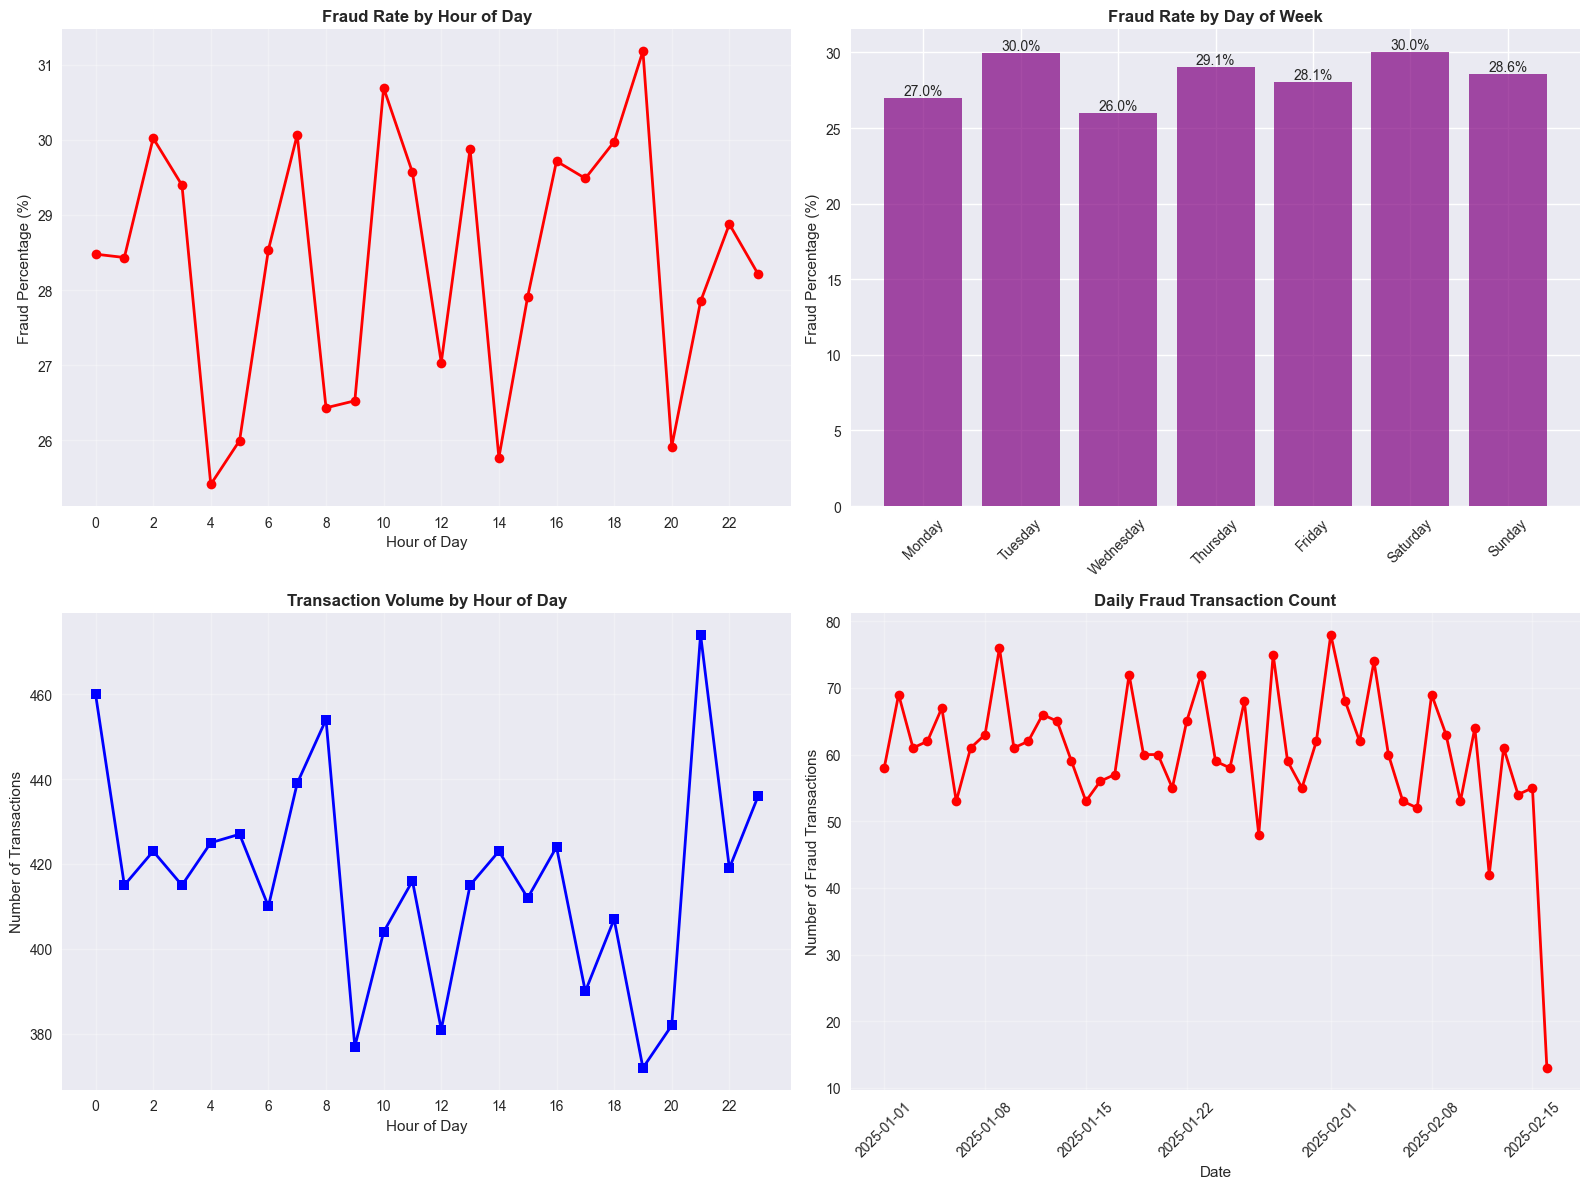

In [18]:
# Time series visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Hourly fraud rate
hourly_data = df.groupby('Hour')['Is_Fraud'].mean() * 100
axes[0,0].plot(hourly_data.index, hourly_data.values, marker='o', linewidth=2, color='red')
axes[0,0].set_title('Fraud Rate by Hour of Day', fontweight='bold')
axes[0,0].set_xlabel('Hour of Day')
axes[0,0].set_ylabel('Fraud Percentage (%)')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_xticks(range(0, 24, 2))

# Daily fraud rate
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_data = df.groupby('DayOfWeek')['Is_Fraud'].mean() * 100
daily_data = daily_data.reindex(day_order)
bars = axes[0,1].bar(daily_data.index, daily_data.values, color='purple', alpha=0.7)
axes[0,1].set_title('Fraud Rate by Day of Week', fontweight='bold')
axes[0,1].set_ylabel('Fraud Percentage (%)')
axes[0,1].tick_params(axis='x', rotation=45)
for bar in bars:
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height,
                  f'{height:.1f}%', ha='center', va='bottom')

# Transaction volume by hour
hourly_volume = df.groupby('Hour').size()
axes[1,0].plot(hourly_volume.index, hourly_volume.values, marker='s', linewidth=2, color='blue')
axes[1,0].set_title('Transaction Volume by Hour of Day', fontweight='bold')
axes[1,0].set_xlabel('Hour of Day')
axes[1,0].set_ylabel('Number of Transactions')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].set_xticks(range(0, 24, 2))

# Fraud transactions over time (daily)
daily_fraud_count = df[df['Is_Fraud'] == 1].groupby('Date').size()
axes[1,1].plot(daily_fraud_count.index, daily_fraud_count.values, marker='o', linewidth=2, color='red')
axes[1,1].set_title('Daily Fraud Transaction Count', fontweight='bold')
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('Number of Fraud Transactions')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Fraud is not spread evenly throughout the day or week. Certain hours (like late at night) and some days have higher fraud rates. This helps banks know when to be extra careful and monitor transactions more closely.

## 6. Geographic Analysis

In [19]:
print("\n6. GEOGRAPHIC ANALYSIS")
print("=" * 35)

# Extract country from Transaction_Location
df['Country'] = df['Transaction_Location'].str.split(',').str[-1].str.strip()


6. GEOGRAPHIC ANALYSIS


In [20]:
print("\nTop 10 Countries by Fraud Percentage:")
print("-" * 40)
country_fraud = df.groupby('Country')['Is_Fraud'].agg(['count', 'mean']).sort_values('mean', ascending=False)
country_fraud['fraud_percentage'] = country_fraud['mean'] * 100
country_fraud = country_fraud[country_fraud['count'] >= 5]  # Filter countries with at least 5 transactions
print(country_fraud[['count', 'fraud_percentage']].head(10))


Top 10 Countries by Fraud Percentage:
----------------------------------------
                          count  fraud_percentage
Country                                          
Ireland                      28         50.000000
Guernsey                     40         47.500000
Iceland                      38         44.736842
Qatar                        27         44.444444
Martinique                   44         43.181818
Guinea-Bissau                49         42.857143
Uganda                       57         42.105263
Benin                        43         41.860465
Canada                       39         41.025641
Turks and Caicos Islands     44         40.909091


Fraud can happen anywhere, but some countries or locations see more fraud than others. By knowing which places are riskier, banks can focus their security efforts where they’re needed most.

In [21]:
print(f"\nTotal Number of Unique Countries: {df['Country'].nunique()}")


Total Number of Unique Countries: 243


## 7. Correlation Analysis

In [22]:
print("\n7. CORRELATION ANALYSIS")
print("=" * 35)

# Select numerical columns for correlation
corr_columns = ['Transaction_Amount', 'Account_Age', 'Credit_Score', 'Previous_Fraud', 'Is_Fraud']
correlation_matrix = df[corr_columns].corr()

print("Correlation Matrix:")
print(correlation_matrix)


7. CORRELATION ANALYSIS
Correlation Matrix:
                    Transaction_Amount  Account_Age  Credit_Score  \
Transaction_Amount            1.000000     0.003320     -0.011051   
Account_Age                   0.003320     1.000000     -0.001525   
Credit_Score                 -0.011051    -0.001525      1.000000   
Previous_Fraud                0.004916    -0.004115     -0.007973   
Is_Fraud                      0.103275    -0.009161     -0.124406   

                    Previous_Fraud  Is_Fraud  
Transaction_Amount        0.004916  0.103275  
Account_Age              -0.004115 -0.009161  
Credit_Score             -0.007973 -0.124406  
Previous_Fraud            1.000000  0.338558  
Is_Fraud                  0.338558  1.000000  


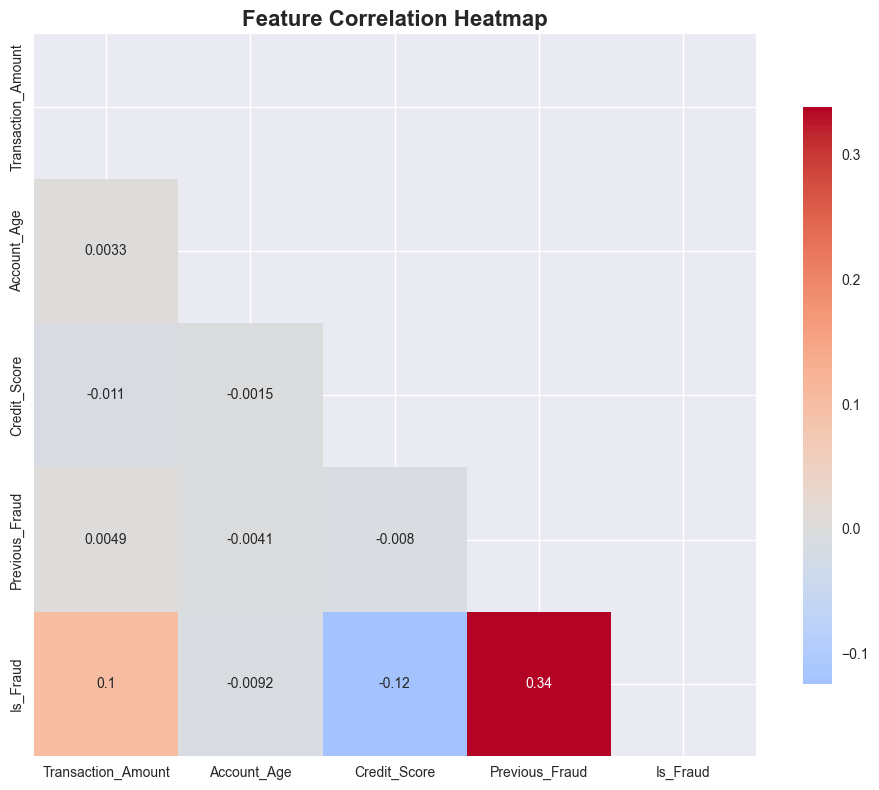

In [23]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, mask=mask, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Some features are related to each other. For example, higher transaction amounts might be linked to a higher chance of fraud. Understanding these relationships helps banks build better fraud detection systems.

## 8. Customer Behavior Analysis

In [24]:
print("\n8. CUSTOMER BEHAVIOR ANALYSIS")
print("=" * 40)

# Customers with multiple transactions
customer_transaction_count = df['Customer_ID'].value_counts()
print(f"Customers with only 1 transaction: {(customer_transaction_count == 1).sum():,}")
print(f"Customers with multiple transactions: {(customer_transaction_count > 1).sum():,}")
print(f"Maximum transactions by a single customer: {customer_transaction_count.max()}")


8. CUSTOMER BEHAVIOR ANALYSIS
Customers with only 1 transaction: 3,214
Customers with multiple transactions: 2,771
Maximum transactions by a single customer: 7


In [25]:
# Customers with fraud history
fraudulent_customers = df[df['Is_Fraud'] == 1]['Customer_ID'].nunique()
customers_with_previous_fraud = df[df['Previous_Fraud'] == 1]['Customer_ID'].nunique()

print(f"\nUnique customers with fraudulent transactions: {fraudulent_customers:,}")
print(f"Unique customers with previous fraud history: {customers_with_previous_fraud:,}")


Unique customers with fraudulent transactions: 2,439
Unique customers with previous fraud history: 3,841


In [26]:
# Customer segmentation by fraud activity
customer_summary = df.groupby('Customer_ID').agg({
    'Is_Fraud': ['count', 'sum', 'mean'],
    'Transaction_Amount': ['mean', 'std'],
    'Credit_Score': 'first',
    'Account_Age': 'first'
}).round(2)

customer_summary.columns = ['Total_Transactions', 'Fraud_Count', 'Fraud_Rate', 
                          'Avg_Amount', 'Amount_Std', 'Credit_Score', 'Account_Age']

print("\nCustomer Behavior Summary Statistics:")
print(customer_summary.describe())


Customer Behavior Summary Statistics:
       Total_Transactions  Fraud_Count   Fraud_Rate   Avg_Amount   Amount_Std  \
count         5985.000000  5985.000000  5985.000000  5985.000000  2771.000000   
mean             1.670844     0.474185     0.288224  5003.394471  2438.054735   
std              0.873477     0.627503     0.391871  2519.723711  1510.310507   
min              1.000000     0.000000     0.000000    10.890000     1.690000   
25%              1.000000     0.000000     0.000000  3114.630000  1232.120000   
50%              1.000000     0.000000     0.000000  4992.480000  2307.290000   
75%              2.000000     1.000000     0.500000  6897.040000  3481.850000   
max              7.000000     4.000000     1.000000  9996.930000  6895.230000   

       Credit_Score  Account_Age  
count   5985.000000  5985.000000  
mean     579.572932    10.553551  
std      158.195889     5.770382  
min      300.000000     1.000000  
25%      445.000000     6.000000  
50%      580.000000  

Some customers make many transactions, while others make only a few. Customers with a history of fraud or lots of transactions are more likely to be involved in fraud again. This helps banks identify which customers might need extra protection.

## 9. Risk Factor Analysis

In [27]:
print("\n9. RISK FACTOR ANALYSIS")
print("=" * 35)

# Create risk segments
df['Amount_Category'] = pd.cut(df['Transaction_Amount'], 
                             bins=[0, 1000, 5000, 10000, float('inf')],
                             labels=['Low', 'Medium', 'High', 'Very High'])

df['Credit_Score_Category'] = pd.cut(df['Credit_Score'],
                                   bins=[0, 500, 650, 750, 850, 1000],
                                   labels=['Very Poor', 'Poor', 'Fair', 'Good', 'Excellent'])


9. RISK FACTOR ANALYSIS


In [28]:
print("\nFraud Rate by Amount Category:")
print("-" * 35)
amount_risk = df.groupby('Amount_Category')['Is_Fraud'].mean() * 100
print(amount_risk)

print("\nFraud Rate by Credit Score Category:")
print("-" * 40)
credit_risk = df.groupby('Credit_Score_Category')['Is_Fraud'].mean() * 100
print(credit_risk)


Fraud Rate by Amount Category:
-----------------------------------
Amount_Category
Low          24.205607
Medium       22.663966
High         33.808472
Very High          NaN
Name: Is_Fraud, dtype: float64

Fraud Rate by Credit Score Category:
----------------------------------------
Credit_Score_Category
Very Poor    35.724332
Poor         23.769595
Fair         25.162690
Good         24.327234
Excellent          NaN
Name: Is_Fraud, dtype: float64


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


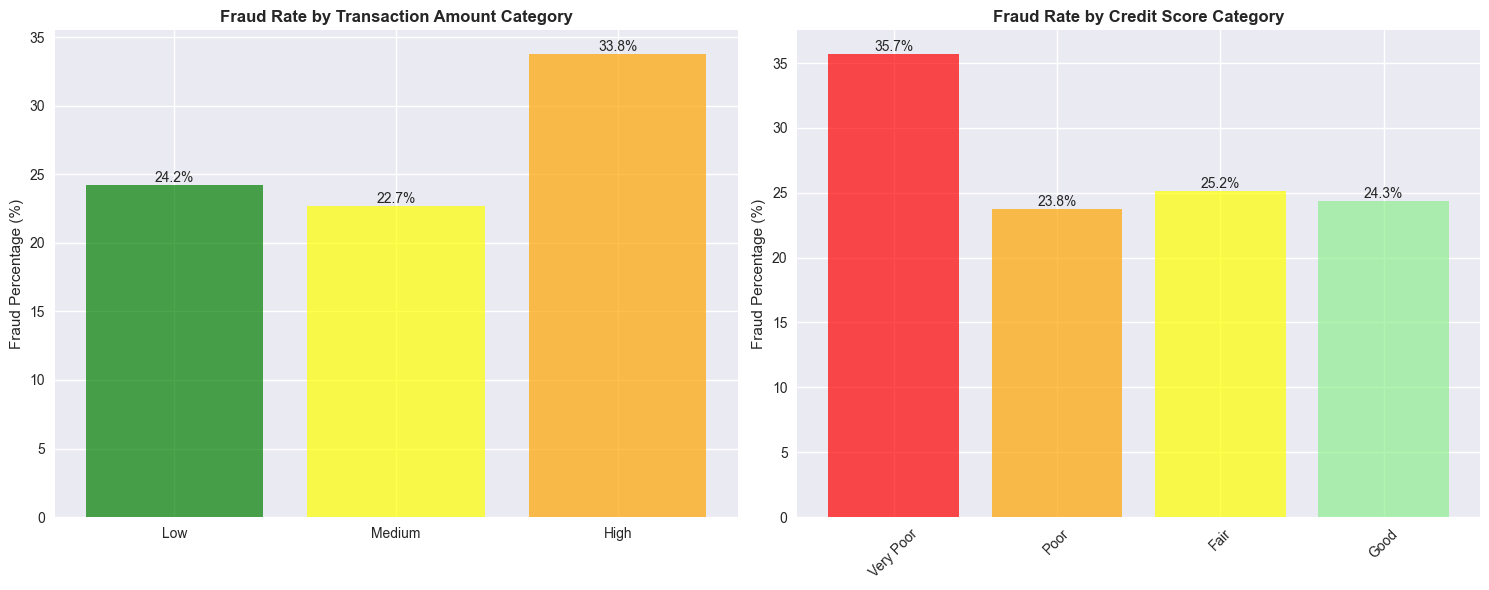

In [29]:
# Risk factor visualizations
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Amount Category
amount_fraud = df.groupby('Amount_Category')['Is_Fraud'].mean() * 100
bars1 = axes[0].bar(amount_fraud.index, amount_fraud.values, color=['green', 'yellow', 'orange', 'red'], alpha=0.7)
axes[0].set_title('Fraud Rate by Transaction Amount Category', fontweight='bold')
axes[0].set_ylabel('Fraud Percentage (%)')
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom')

# Credit Score Category
credit_fraud = df.groupby('Credit_Score_Category')['Is_Fraud'].mean() * 100
bars2 = axes[1].bar(credit_fraud.index, credit_fraud.values, color=['red', 'orange', 'yellow', 'lightgreen', 'green'], alpha=0.7)
axes[1].set_title('Fraud Rate by Credit Score Category', fontweight='bold')
axes[1].set_ylabel('Fraud Percentage (%)')
axes[1].tick_params(axis='x', rotation=45)
for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Big transactions and low credit scores are riskier. Transactions with high amounts or by people with lower credit scores are more likely to be fraudulent. Banks can use this to decide when to add extra checks or warnings.

## 10. Key Insights Summary

In [30]:
print("\n" + "=" * 60)
print("KEY INSIGHTS SUMMARY")
print("=" * 60)

# Calculate key metrics
total_fraud = df['Is_Fraud'].sum()
fraud_rate = (total_fraud / len(df)) * 100
high_risk_transactions = len(df[df['Transaction_Amount'] > 5000])
high_risk_fraud_rate = (df[df['Transaction_Amount'] > 5000]['Is_Fraud'].mean()) * 100

print(f"📊 Overall Fraud Rate: {fraud_rate:.2f}%")
print(f"🔢 Total Fraudulent Transactions: {total_fraud:,}")
print(f"💳 Most Risky Transaction Type: {transaction_fraud_plot.index[0]} ({transaction_fraud_plot.iloc[0]*100:.1f}% fraud)")
print(f"📱 Most Risky Device: {device_fraud_plot.index[0]} ({device_fraud_plot.iloc[0]*100:.1f}% fraud)")
print(f"⏰ Highest Fraud Hour: {hourly_fraud.idxmax()}:00 ({hourly_fraud.max():.1f}% fraud)")
print(f"💰 High-value Transactions (>$5,000): {high_risk_transactions:,} ({high_risk_fraud_rate:.1f}% fraud rate)")
print(f"🌍 Countries with Highest Fraud: {country_fraud.index[0]} ({country_fraud.iloc[0]['fraud_percentage']:.1f}% fraud)")

print("\n🎯 RECOMMENDATIONS:")
print("• Focus monitoring on high-risk transaction types and devices")
print("• Implement enhanced verification for high-value transactions")
print("• Increase surveillance during peak fraud hours")
print("• Pay special attention to customers with previous fraud history")
print("• Consider geographic risk factors in fraud detection rules")


KEY INSIGHTS SUMMARY
📊 Overall Fraud Rate: 28.38%
🔢 Total Fraudulent Transactions: 2,838
💳 Most Risky Transaction Type: Withdrawal (29.5% fraud)
📱 Most Risky Device: Mobile (28.7% fraud)
⏰ Highest Fraud Hour: 19:00 (31.2% fraud)
💰 High-value Transactions (>$5,000): 4,981 (33.8% fraud rate)
🌍 Countries with Highest Fraud: Ireland (50.0% fraud)

🎯 RECOMMENDATIONS:
• Focus monitoring on high-risk transaction types and devices
• Implement enhanced verification for high-value transactions
• Increase surveillance during peak fraud hours
• Pay special attention to customers with previous fraud history
• Consider geographic risk factors in fraud detection rules


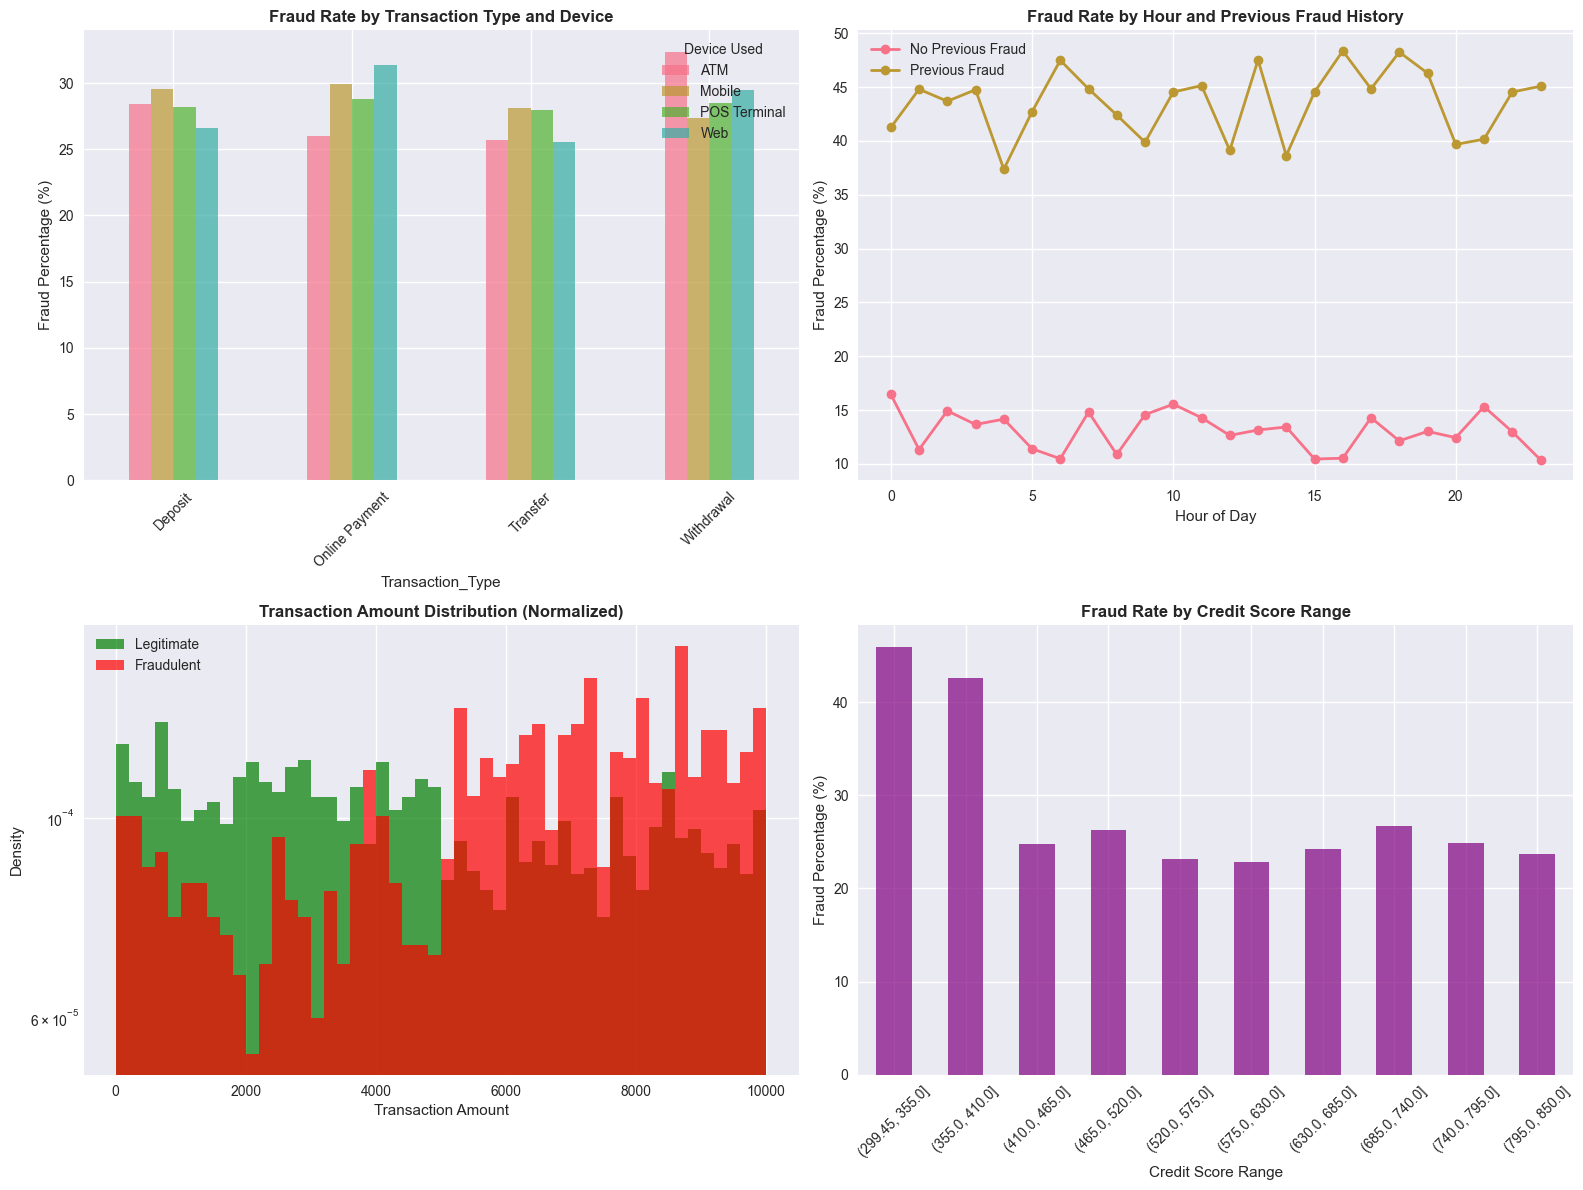


ANALYSIS COMPLETED SUCCESSFULLY!


In [31]:
# Final comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Fraud by transaction type and device (stacked)
fraud_by_type_device = pd.crosstab(df['Transaction_Type'], df['Device_Used'], 
                                  values=df['Is_Fraud'], aggfunc='mean') * 100
fraud_by_type_device.plot(kind='bar', ax=axes[0,0], alpha=0.7)
axes[0,0].set_title('Fraud Rate by Transaction Type and Device', fontweight='bold')
axes[0,0].set_ylabel('Fraud Percentage (%)')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].legend(title='Device Used')

# 2. Fraud rate by hour and previous fraud
hour_prev_fraud = df.groupby(['Hour', 'Previous_Fraud'])['Is_Fraud'].mean().unstack() * 100
hour_prev_fraud.plot(ax=axes[0,1], marker='o', linewidth=2)
axes[0,1].set_title('Fraud Rate by Hour and Previous Fraud History', fontweight='bold')
axes[0,1].set_ylabel('Fraud Percentage (%)')
axes[0,1].set_xlabel('Hour of Day')
axes[0,1].legend(['No Previous Fraud', 'Previous Fraud'])

# 3. Transaction amount distribution by fraud status
fraud_amounts = df[df['Is_Fraud'] == 1]['Transaction_Amount']
legit_amounts = df[df['Is_Fraud'] == 0]['Transaction_Amount']
axes[1,0].hist(legit_amounts, bins=50, alpha=0.7, label='Legitimate', color='green', density=True)
axes[1,0].hist(fraud_amounts, bins=50, alpha=0.7, label='Fraudulent', color='red', density=True)
axes[1,0].set_title('Transaction Amount Distribution (Normalized)', fontweight='bold')
axes[1,0].set_xlabel('Transaction Amount')
axes[1,0].set_ylabel('Density')
axes[1,0].legend()
axes[1,0].set_yscale('log')

# 4. Credit score vs fraud rate
credit_bins = pd.cut(df['Credit_Score'], bins=10)
credit_fraud_rate = df.groupby(credit_bins)['Is_Fraud'].mean() * 100
credit_fraud_rate.plot(kind='bar', ax=axes[1,1], color='purple', alpha=0.7)
axes[1,1].set_title('Fraud Rate by Credit Score Range', fontweight='bold')
axes[1,1].set_ylabel('Fraud Percentage (%)')
axes[1,1].set_xlabel('Credit Score Range')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("ANALYSIS COMPLETED SUCCESSFULLY!")
print("=" * 60)

**In summary:**  
Your bank uses these insights to keep your money safe. If you get extra security checks, it’s to protect you from fraud. Understanding these patterns helps everyone stay safer online.